In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.api import qqplot
from scipy.stats import boxcox
from scipy.stats import levene
from scipy.stats import mannwhitneyu,wilcoxon
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [260]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [261]:
df.shape

(144867, 24)

In [262]:
df.columns


Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [264]:
  df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [265]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [266]:
df.describe(include=object).T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-22 04:55:04.835022,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153759210483476123,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


In [267]:
df[df.duplicated()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


In [268]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [269]:
#Dropping unknown fields

unknown_fields=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor']
df.drop(unknown_fields,axis=1,inplace=True)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [270]:
df.shape

(144867, 19)

In [271]:
#checking unique values for each column
for i in df.columns:
  print(i,':',df[i].nunique())


data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799


In [272]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [273]:
#convert data type of columns data and route_type to category as they have only 2 unique values

df['data']=df['data'].astype('category')
df['route_type']=df['route_type'].astype('category')


#convert time columns to datetime format
datetime_cols=['trip_creation_time','od_start_time','od_end_time']
for i in datetime_cols:
  df[i]=pd.to_datetime(df[i])



In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [275]:
#Time period for which data is given
df['trip_creation_time'].min(),df['trip_creation_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-03 23:59:42.701692'))

# 1. Basic Data Cleaning and Exploration

###  Handle missing values in data

In [276]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


- In whole data only source_name and destination_name has missing values

In [277]:
def missing_data(data):
  total_missing_data=data.isna().sum()
  percent_missing_data=round(total_missing_data/len(data)*100,2)
  missing_data_df=pd.DataFrame({'Total Missing Data':total_missing_data,'Percent Missing Data':percent_missing_data})
  return missing_data_df

In [278]:
missing_df=missing_data(df)
missing_df[missing_df['Total Missing Data']>0]

,Total Missing Data,Percent Missing Data
source_name,293,0.20
destination_name,261,0.18


- From source_name 0.2% data is missing
- From destination_name 0.18% data is missing

In [279]:
(df['source_name'].isnull().sum() + df['destination_name'].isnull().sum())/df.shape[0]*100

np.float64(0.3824197367240296)

- As total missing data is only 0.38% of whole data which is less than 1%, so if we drop this then it will not impact the whole data

In [280]:
df.dropna(subset=['source_name','destination_name'],inplace=True)

In [281]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


INSIGHTS:

- Only two have a tiny fraction of missing values i.e. less than 0.5% of data
- Since we have plenty of data to work with we wnat to get rid of missing values instead of trying to guess with methods like averageor or most common value
- Dropping the missing values to keep things simple and mess up how features are spread out, but if lot more data was missing then we could have used other methods

Merging Rows and aggregation of fields

In [282]:
# Grouping by segment
# Creating unique identifier for each segment

segment_cols=['segment_actual_time','segment_osrm_time','segment_osrm_distance']
df['segment_key']=df['trip_uuid'] + '+' + df['source_center'] + '+' + df['destination_center']

for col in segment_cols:
  df[col + '_sum']=df.groupby('segment_key')[col].cumsum()

df[['segment_key','segment_actual_time','segment_actual_time_sum','segment_osrm_time','segment_osrm_time_sum','segment_osrm_distance','segment_osrm_distance_sum']]

,segment_key,segment_actual_time,segment_actual_time_sum,segment_osrm_time,segment_osrm_time_sum,segment_osrm_distance,segment_osrm_distance_sum
0,trip-153741093647649320+IND388121AAA+IND388620AAB,14.0,14.0,11.0,11.0,11.9653,11.9653
1,trip-153741093647649320+IND388121AAA+IND388620AAB,10.0,24.0,9.0,20.0,9.7590,21.7243
2,trip-153741093647649320+IND388121AAA+IND388620AAB,16.0,40.0,7.0,27.0,10.8152,32.5395
3,trip-153741093647649320+IND388121AAA+IND388620AAB,21.0,61.0,12.0,39.0,13.0224,45.5619
4,trip-153741093647649320+IND388121AAA+IND388620AAB,6.0,67.0,5.0,44.0,3.9153,49.4772
...,...,...,...,...,...,...,...
144862,trip-153746066843555182+IND131028AAB+IND000000ACB,12.0,92.0,12.0,94.0,8.1858,65.3487
144863,trip-153746066843555182+IND131028AAB+IND000000ACB,26.0,118.0,21.0,115.0,17.3725,82.7212
144864,trip-153746066843555182+IND131028AAB+IND000000ACB,20.0,138.0,34.0,149.0,20.7053,103.4265
144865,trip-153746066843555182+IND131028AAB+IND000000ACB,17.0,155.0,27.0,176.0,18.8885,122.3150


In [283]:
segment_dict={
    'trip_uuid':'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_center': 'first',
  'destination_center': 'last',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last'
}

# grouping by segment_key and aggregating

segment_agg_data=df.groupby('segment_key').agg(segment_dict).reset_index()
segment_agg_data.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_center,destination_center,source_name,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,...,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,...,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,...,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408


In [284]:
segment_dict_trip = {
    'source_center' : 'first',
    'destination_center' : 'last',
    'data' : 'first',
    'route_type' : 'first',
    'trip_creation_time' : 'first',
    'source_name' : 'first',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time' : 'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance' : 'sum'}

df_trip_uuid=segment_agg_data.groupby('trip_uuid').agg(segment_dict_trip).reset_index()
df1=df_trip_uuid.copy()
df_trip_uuid.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


- The rows have been merged on unique segment_key which is combination of trip_uuid,source_centre and destination_centre
- The aggregated dataset reflects total values for each segment of trip

# 2. Build some features to prepare the data for actual analysis. Extract features from the below fields:

### Destination Name: Split and extract features out of destination. City-place-code (State)

In [285]:
df1[['destination','dest_state']]=df1['destination_name'].str.split('(',n=1,expand=True)
df1['dest_state']=df1['dest_state'].str.rstrip(')')
df1[['dest_city','dest_place','dest_code']]=df1['destination'].str.split('_',n=2,expand=True)
df1.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,destination,dest_state,dest_city,dest_place,dest_code
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,...,717.0,991.3523,1548.0,1008.0,1320.4733,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,...,68.0,85.1110,141.0,65.0,84.1894,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,...,1740.0,2354.0665,3308.0,1941.0,2545.2678,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,...,15.0,19.6800,59.0,16.0,19.8766,Mumbai_MiraRd_IP,Maharashtra,Mumbai,MiraRd,IP
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,...,117.0,146.7918,340.0,115.0,146.7919,Sandur_WrdN1DPP_D,Karnataka,Sandur,WrdN1DPP,D


### Source Name: Split and extract features out of destination. City-place-code (State)

In [286]:
df1[['source','source_state']]=df1['source_name'].str.split('(',n=1,expand=True)
df1['source_state']=df1['source_state'].str.rstrip(')')
df1[['source_city','source_place','source_code']]=df1['source'].str.split('_',n=2,expand=True)
df1.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,...,destination,dest_state,dest_city,dest_place,dest_code,source,source_state,source_city,source_place,source_code
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,...,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,...,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,...,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,...,Mumbai_MiraRd_IP,Maharashtra,Mumbai,MiraRd,IP,Mumbai Hub,Maharashtra,Mumbai Hub,None,None
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,...,Sandur_WrdN1DPP_D,Karnataka,Sandur,WrdN1DPP,D,Bellary_Dc,Karnataka,Bellary,Dc,None


In [287]:
df1.columns

Index(['trip_uuid', 'source_center', 'destination_center', 'data',
       'route_type', 'trip_creation_time', 'source_name', 'destination_name',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'destination', 'dest_state', 'dest_city',
       'dest_place', 'dest_code', 'source', 'source_state', 'source_city',
       'source_place', 'source_code'],
      dtype='object')

### Trip_creation_time: Extract features like month, year and day etc

In [288]:
df1['trip_creation_year']=pd.to_datetime(df['trip_creation_time']).dt.year
df1['trip_creation_year'].head()

,trip_creation_year
0,2018.0
1,2018.0
2,2018.0
3,2018.0
4,2018.0


In [289]:
df1['trip_creation_month']=pd.to_datetime(df['trip_creation_time']).dt.month
df1['trip_creation_month'].head()

,trip_creation_month
0,9.0
1,9.0
2,9.0
3,9.0
4,9.0


In [290]:
df1['trip_creation_day']=pd.to_datetime(df['trip_creation_time']).dt.day
df1['trip_creation_day'].head()

,trip_creation_day
0,20.0
1,20.0
2,20.0
3,20.0
4,20.0


In [291]:
df1['trip_creation_week']=pd.to_datetime(df['trip_creation_time']).dt.isocalendar().week
df1['trip_creation_week'].head()

,trip_creation_week
0,38
1,38
2,38
3,38
4,38


In [292]:
df1['trip_creation_hour']=pd.to_datetime(df['trip_creation_time']).dt.hour
df1['trip_creation_hour'].head()

,trip_creation_hour
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


In [293]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14787,2018-09-22 12:26:28.269885696,2018-09-12 00:00:16.535741,2018-09-17 02:38:18.128431872,2018-09-22 03:39:19.609193984,2018-09-27 19:23:14.074359552,2018-10-03 23:59:42.701692,NaN
od_start_time,14787,2018-09-22 14:39:56.325738496,2018-09-12 00:01:00.113710,2018-09-17 05:23:23.166219520,2018-09-22 05:37:28.196830976,2018-09-27 20:42:21.489692672,2018-10-06 04:27:23.392375,NaN
od_end_time,14787,2018-09-22 20:49:39.860267008,2018-09-12 00:50:10.814399,2018-09-17 11:01:12.272902912,2018-09-22 12:46:03.655276032,2018-09-28 02:23:08.496503040,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,14787.0,529.429025,23.0,149.0,279.0,632.0,7898.0,658.254936
actual_distance_to_destination,14787.0,164.090196,9.002461,22.777099,48.287894,163.591258,2186.531787,305.502982
actual_time,14787.0,356.306012,9.0,67.0,148.0,367.0,6265.0,561.517936
osrm_time,14787.0,160.990938,6.0,29.0,60.0,168.0,2032.0,271.459495
osrm_distance,14787.0,203.887411,9.0729,30.7569,65.3028,206.6442,2840.081,370.565564
segment_actual_time,14787.0,353.059174,9.0,66.0,147.0,364.0,6230.0,556.365911
segment_osrm_time,14787.0,180.511598,6.0,30.0,65.0,184.0,2564.0,314.679279


## Data Visualization

### Most preferred route type for Delivery

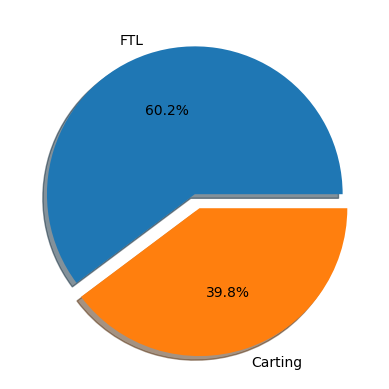

In [294]:
plt.pie(df1['route_type'].value_counts(),labels=df['route_type'].value_counts().index,explode=(0,0.1),shadow=True,autopct='%1.1f%%')
plt.show()

**INSIGHTS**:
- Most of them using FTL shipments route type
- FTL: 68.8%
- Carting: 31.2%

### How many trips are created on hourly basis

In [295]:
df_hour=df1.groupby('trip_creation_hour').agg({'trip_uuid':'count'}).reset_index()
df_hour.head()

,trip_creation_hour,trip_uuid
0,0.0,640
1,1.0,743
2,2.0,776
3,3.0,365
4,4.0,567


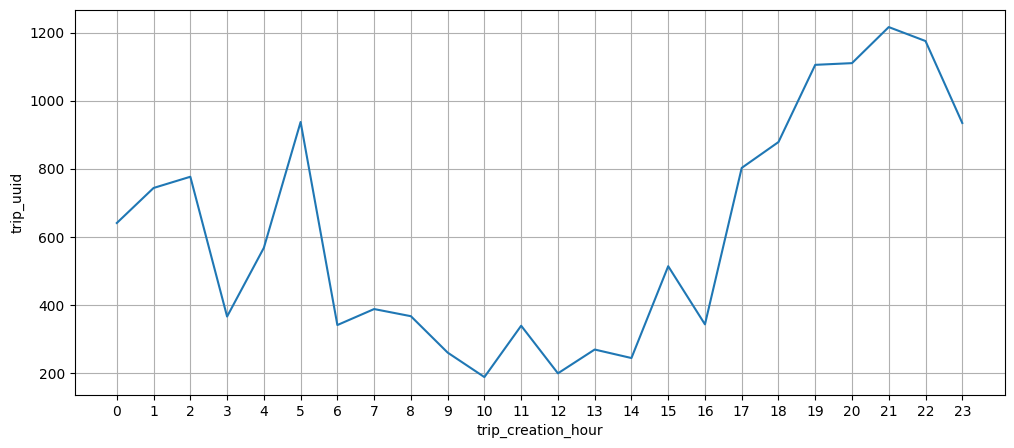

In [296]:
plt.figure(figsize=(12,5))
sns.lineplot(x='trip_creation_hour',y='trip_uuid',data=df_hour)
plt.xticks(np.arange(0,24))
plt.grid(True)
plt.show()

**INSIGHTS**:
- No. of trips increasing after the noon becomes maximum at 10 PM and then start decreasing
- Min no. of trips at 12 PM
- In morning there are less no of trips

In [297]:
df1['trip_creation_month'].unique()

array([ 9., 10., nan])

### How many trips are created in September and October

In [298]:
df_month=df1.groupby('trip_creation_month').agg({'trip_uuid':'count'}).reset_index()
df_month['percent']=np.round(df_month['trip_uuid']/df_month['trip_uuid'].sum()*100,2)
df_month.head()

,trip_creation_month,trip_uuid,percent
0,9.0,13019,88.63
1,10.0,1670,11.37


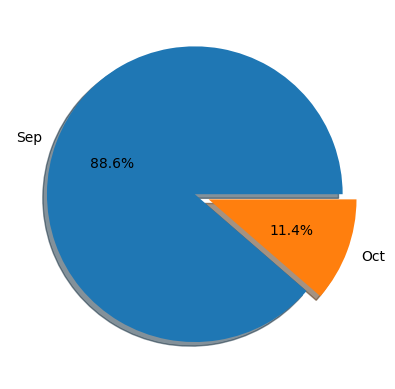

In [299]:
plt.pie(df_month['trip_uuid'],labels=['Sep','Oct'],explode=(0,0.1),shadow=True,autopct='%1.1f%%')
plt.show()

**INSIGHTS**:
- No. of trips in september month is significantly higher than october


### Trip Creation Day

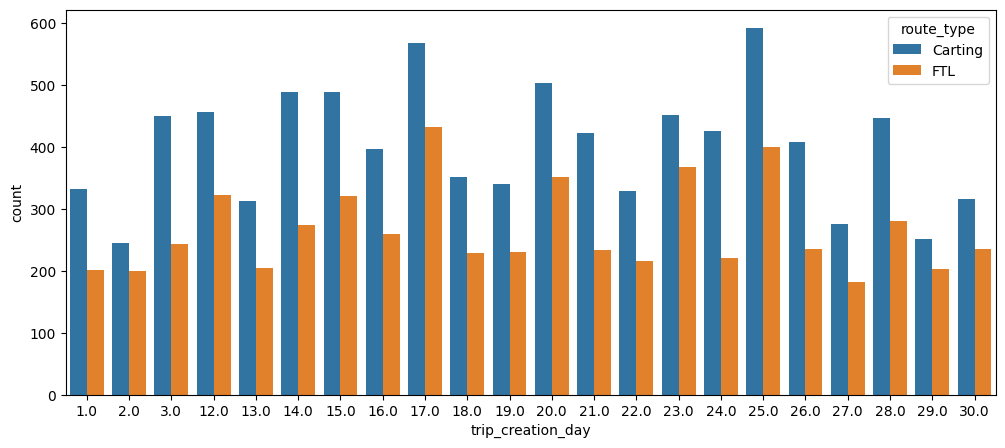

In [300]:
plt.figure(figsize=(12,5))
sns.countplot(x='trip_creation_day',hue='route_type',data=df1)
plt.show()

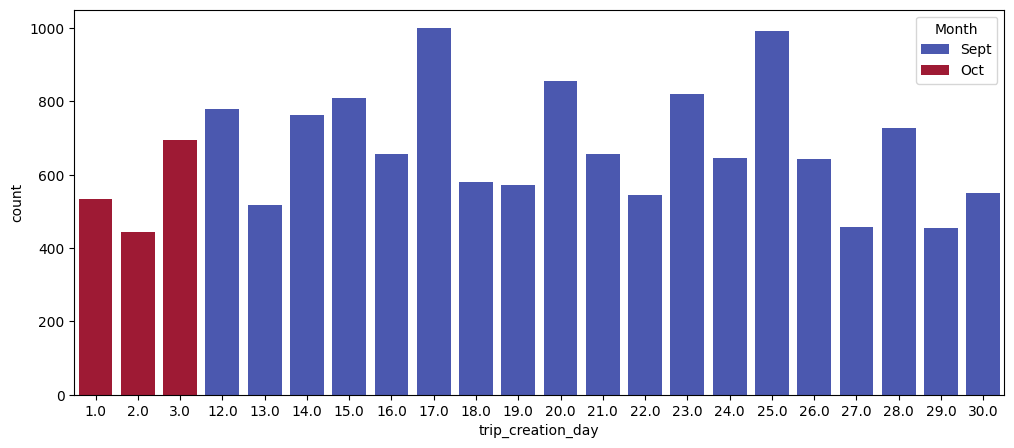

In [301]:
labels=['Sept','Oct']
plt.figure(figsize=(12,5))
sns.countplot(x='trip_creation_day',hue='trip_creation_month',data=df1,palette='coolwarm')
plt.legend(title='Month',labels=labels)
plt.show()

**INSIGHTS**:
- No of Trips in September is consistently higher compared to October
- From 12th day to end of month there is trip in september
- Most September days have count above ~6000 trips
- Peak days in September are 15,18 and 21 having highest trip count(~7400 - 7700)
- In October, the first three days have trip counts b/w 5400-6100 which is significantly lower than average september days

### Top 5 Destination State with Delivery Count

In [302]:
df_dest=df1.groupby('dest_state').agg({'trip_uuid':'count'}).reset_index()
df_dest.sort_values(by='trip_uuid',ascending=False,inplace=True)
df_dest.head()

,dest_state,trip_uuid
18,Maharashtra,2561
15,Karnataka,2294
11,Haryana,1640
25,Tamil Nadu,1084
28,Uttar Pradesh,805


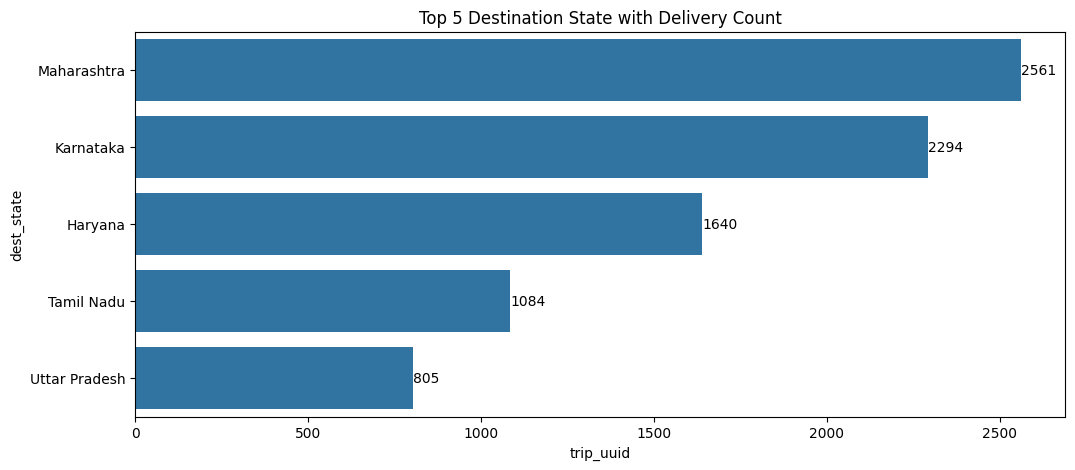

In [303]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x='trip_uuid',y='dest_state',data=df_dest.head())
plt.title('Top 5 Destination State with Delivery Count')
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

**INSIGHTS**
- Karnataka has highest delivery count(21065) among all states
- Haryana(20622) is slightly behind Karnataka, while Maharashtra (18196) follows closely
- There is noticable drop in delivery count between Maharashtra(18196) and West Bengal(8499)
- Karnataka and Haryana ogether form nearly half of the total deliveries among top 5 states
- Though Telangana(8205) is in top 5, it has less than 40% of Karnataka deliveries

### Top 5 Source State with Delivery Count

In [304]:
df_src=df1.groupby('source_state').agg({'trip_uuid':'count'}).reset_index()
df_src.sort_values(by='trip_uuid',ascending=False,inplace=True)
df_src.head()

,source_state,trip_uuid
17,Maharashtra,2714
14,Karnataka,2143
10,Haryana,1823
24,Tamil Nadu,1039
25,Telangana,784


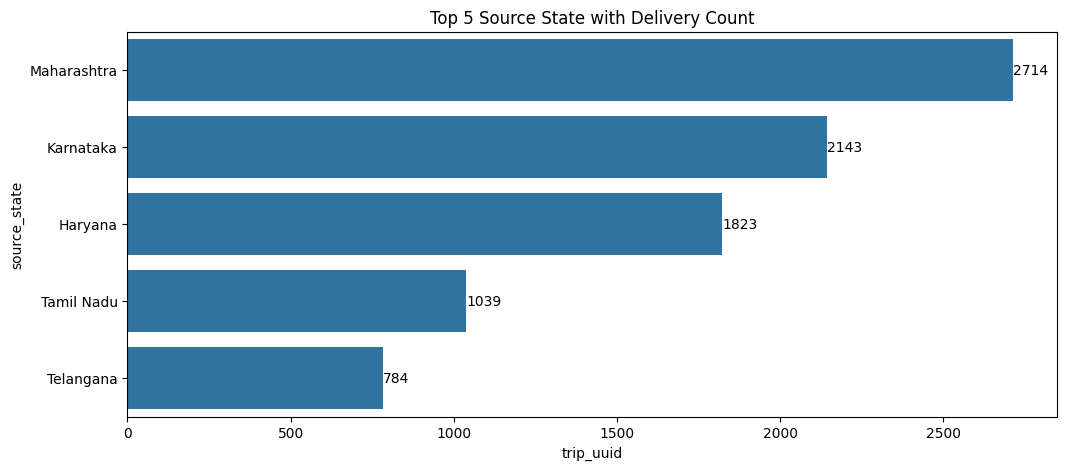

In [305]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x='trip_uuid',y='source_state',data=df_src.head())
plt.title('Top 5 Source State with Delivery Count')
for i in ax.containers:
  ax.bar_label(i,)
plt.show()

**INSIGHTS**
- Haryana has highest delivery count(27499) among all states
- Maharashtra(21421) is slightly behind Haryana, while Karnataka (19578) follows closely
- There is noticable drop in delivery count between Karnataka(19578) and Tamil Nadu(7494)
- Haryana and Maharashtra together form nearly 58% of total deliveries among top 5 states
- Though Gujarat(7202) is in top 5, it has less than 73% of Haryana deliveries

### Top 5 Cities which have more delivery in each state

In [306]:
df_city=df1.groupby(['dest_city','dest_state']).agg({'trip_uuid':'count'}).reset_index()
df_city.sort_values(by='trip_uuid',ascending=False,inplace=True)
df_city.head()

,dest_city,dest_state,trip_uuid
103,Bengaluru,Karnataka,1088
551,Mumbai,Maharashtra,966
302,Gurgaon,Haryana,877
215,Delhi,Delhi,554
79,Bangalore,Karnataka,551


<Figure size 1200x500 with 0 Axes>

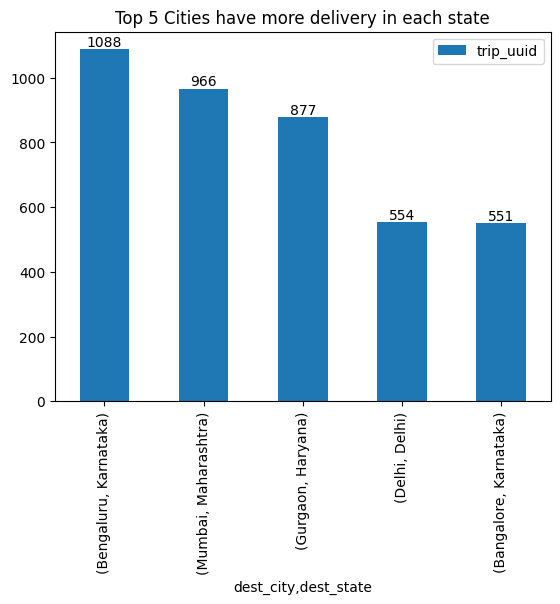

In [307]:
plt.figure(figsize=(12,5))
ax=df1.groupby(['dest_city','dest_state']).agg({'trip_uuid':'count'}).sort_values(by='trip_uuid',ascending=False).head().plot(kind='bar')
plt.title('Top 5 Cities have more delivery in each state')

for i in ax.containers:
  ax.bar_label(i,)
plt.show()

### Top 5 Source Place in each state have more delivery

<Figure size 1200x500 with 0 Axes>

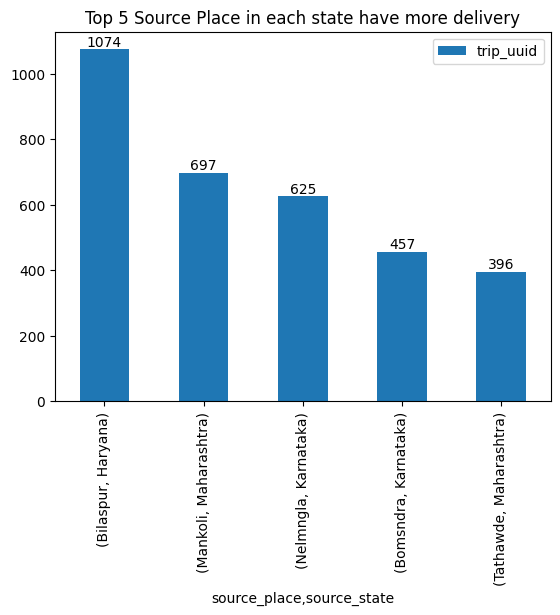

In [308]:
plt.figure(figsize=(12,5))
ax=df1.groupby(['source_place','source_state']).agg({'trip_uuid':'count'}).sort_values(by='trip_uuid',ascending=False).head().plot(kind='bar')
plt.title('Top 5 Source Place in each state have more delivery')

for i in ax.containers:
  ax.bar_label(i,)
plt.show()

**INSIGHTS**:

- With 23464 deliveries, Bilaspur(Haryana) is far ahead of other source places i.e almost 2.3 times higher than Nelmngla(Karnataka)
- Nelmngla(Karnataka) is the second top source with 10053 deliveries but still less than half of Bilaspur(Haryana) count
- Maharashtra appears twice in top 5(Mankoli and Tathawde) with 9088 and 4061 deliveries which shows have wider delivery base
- Sorce Place Shamshbd(Haryana) contributes 3340 deliveries which is ~7x lower than Bilaspur(Haryana)

### Weekday with most delivery of product

In [309]:
df_weekday=df1.groupby('trip_creation_week').agg({'trip_uuid':'count'}).reset_index()
df_weekday.head()

,trip_creation_week,trip_uuid
0,37,3524
1,38,5026
2,39,4469
3,40,1670


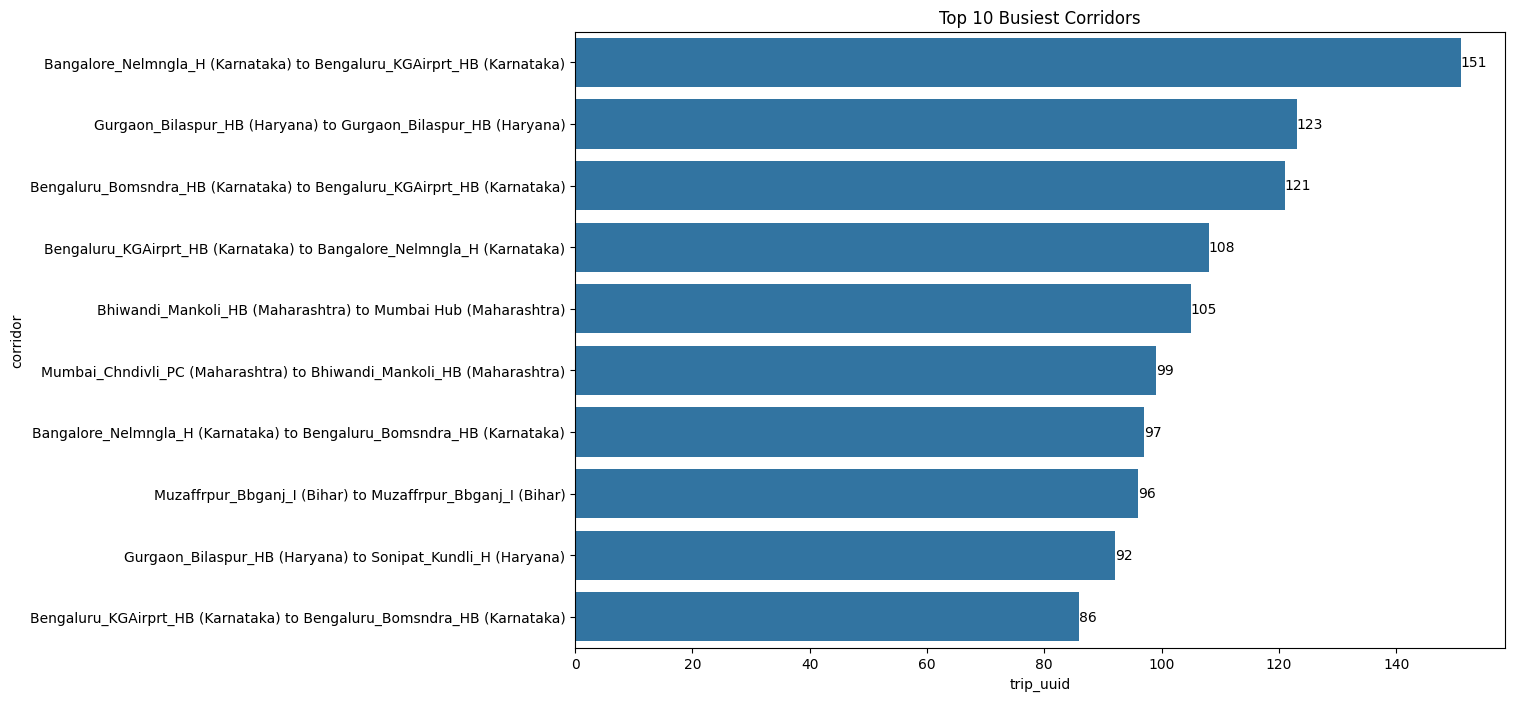

In [310]:
df_corridor = df1.groupby(['source_name', 'destination_name']).agg({'trip_uuid': 'count'}).reset_index()
df_corridor.sort_values(by='trip_uuid', ascending=False, inplace=True)
df_corridor['corridor'] = df_corridor['source_name'] + ' to ' + df_corridor['destination_name']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='trip_uuid', y='corridor', data=df_corridor.head(10))
plt.title('Top 10 Busiest Corridors')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

**INSIGHTS**:

- The plot reveals that the busiest corridors are a mix of intra-city and inter-city routes. For example, the top corridor is from Bangalore to Bengaluru, which are essentially the same city, indicating a high volume of local deliveries.

- The presence of specific hubs like "Gurgaon_Bilaspur_HB (Haryana)" and "Bhiwandi_Mankoli_HB (Maharashtra)" in multiple top corridors suggests that these locations are major hubs for Delhivery's operations.

- The plot shows that some corridors are busy in both directions. For example, the route between "Bengaluru_KGAirprt_HB (Karnataka)" and "Bangalore_Nelmngla_H (Karnataka)" is busy in both directions, indicating a balanced flow of goods.

- By identifying the busiest corridors, Delhivery can optimize resource allocation, such as deploying more vehicles and delivery personnel on these routes to ensure timely deliveries and manage the high volume of shipments effectively.


# In-depth analysis and feature engineering

## Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [311]:
df1.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,...,source,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_week,trip_creation_hour
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,...,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central,H_6,2018.0,9.0,20.0,38,2.0
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,...,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP,D,2018.0,9.0,20.0,38,2.0
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,...,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur,HB,2018.0,9.0,20.0,38,2.0
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,...,Mumbai Hub,Maharashtra,Mumbai Hub,None,None,2018.0,9.0,20.0,38,2.0
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,...,Bellary_Dc,Karnataka,Bellary,Dc,None,2018.0,9.0,20.0,38,2.0


In [312]:
#Calculate time difference between od_start_time and od_end_time
df1['od_total_time']=df1['od_end_time']-df1['od_start_time']

# dropping od_start_time and od_end_time columns
df1.drop(['od_start_time','od_end_time'],axis=1,inplace=True)
df1.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_week,trip_creation_hour,od_total_time
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,...,Uttar Pradesh,Kanpur,Central,H_6,2018.0,9.0,20.0,38,2.0,0 days 00:00:00
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,...,Karnataka,Doddablpur,ChikaDPP,D,2018.0,9.0,20.0,38,2.0,0 days 00:00:00
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,...,Haryana,Gurgaon,Bilaspur,HB,2018.0,9.0,20.0,38,2.0,0 days 00:00:00
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,...,Maharashtra,Mumbai Hub,None,None,2018.0,9.0,20.0,38,2.0,0 days 01:40:29.696112
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,...,Karnataka,Bellary,Dc,None,2018.0,9.0,20.0,38,2.0,0 days 03:52:33.373696


## Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

- Set up Hypothesis framework

--> H0: od_total_time(Total trip time) and start_scan_to_end_scan(Expected Trip time) are same

--> HA: od_total_time(Total trip time) and start_scan_to_end_scan(Expected Trip time) are different

In [313]:
df1['od_total_time']=pd.to_timedelta(df1['od_total_time'])
df1['od_total_time']=df1['od_total_time'].dt.seconds
df1['od_total_time'].head()

,od_total_time
0,0
1,0
2,0
3,6029
4,13953


In [314]:
df1[['od_total_time','start_scan_to_end_scan']].describe()

,od_total_time,start_scan_to_end_scan
count,14787.000000,14787.000000
mean,21890.929938,529.429025
std,22644.299867,658.254936
min,0.000000,23.000000
25%,6823.500000,149.000000
50%,13164.000000,279.000000
75%,27425.500000,632.000000
max,86379.000000,7898.000000


In [315]:
df1[['od_total_time','start_scan_to_end_scan']].corr()

,od_total_time,start_scan_to_end_scan
od_total_time,1.00000,0.34991
start_scan_to_end_scan,0.34991,1.00000


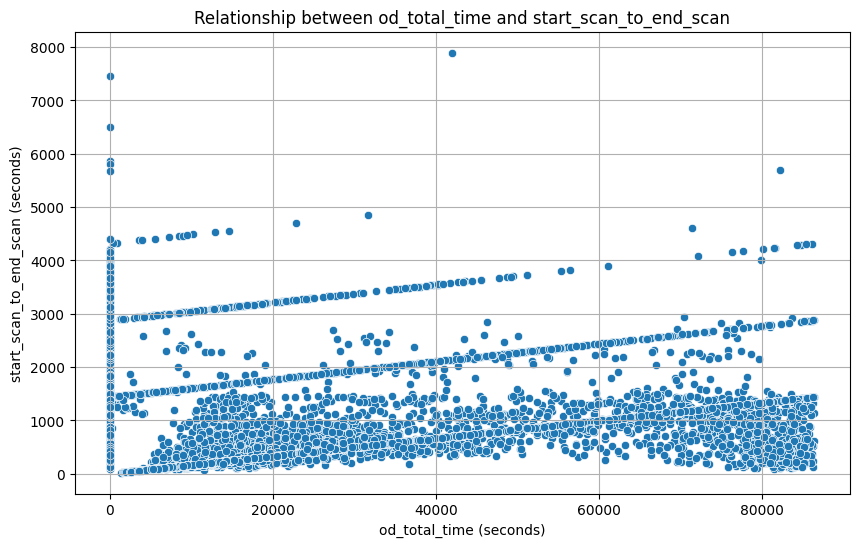

In [316]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='od_total_time', y='start_scan_to_end_scan', data=df1)
plt.title('Relationship between od_total_time and start_scan_to_end_scan')
plt.xlabel('od_total_time (seconds)')
plt.ylabel('start_scan_to_end_scan (seconds)')
plt.grid(True)
plt.show()

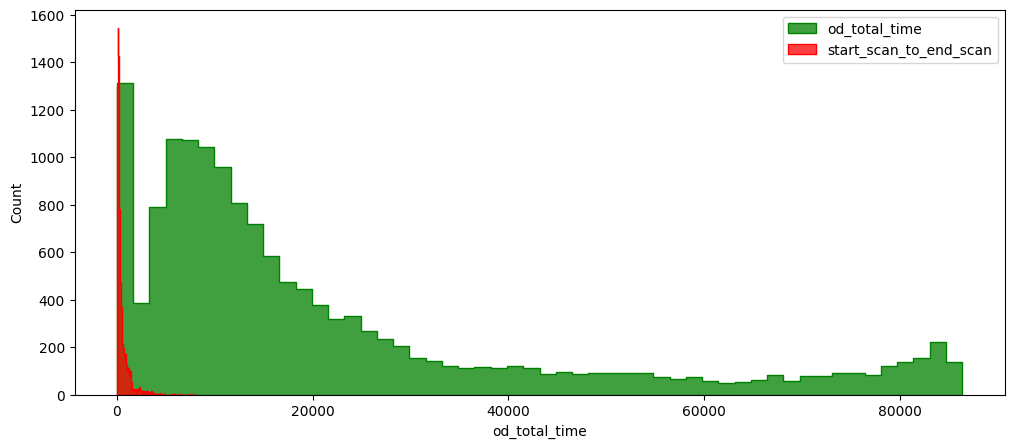

In [317]:
#Visual tests to check if samples follow normal distribution

plt.figure(figsize=(12,5))
sns.histplot(df1['od_total_time'],element='step',color='green')
sns.histplot(df1['start_scan_to_end_scan'],element='step',color='red')
plt.legend(['od_total_time','start_scan_to_end_scan'])
plt.show()

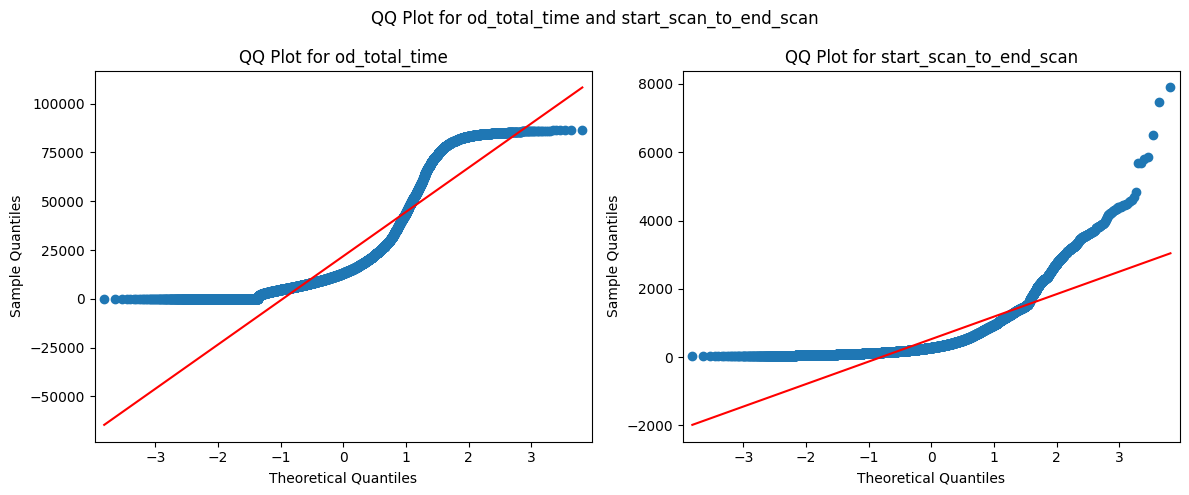

In [318]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.suptitle('QQ Plot for od_total_time and start_scan_to_end_scan')

# QQ for od_total_time
qqplot(df1['od_total_time'].dropna(), line='s', dist=stats.norm, ax=axes[0])
axes[0].set_title('QQ Plot for od_total_time')

# QQ for start_scan_to_end_scan
qqplot(df1['start_scan_to_end_scan'].dropna(), line='s', dist=stats.norm, ax=axes[1])
axes[1].set_title('QQ Plot for start_scan_to_end_scan')

plt.tight_layout()
plt.show()


It can be seen from above plots that samples do not come from normal distribution

Apply Shapiro Wilk test for Normality

- H0: Sample follows Normal Dsitribution
- HA: Sample does not follow Normal Distribution

In [319]:
stats,p_val=shapiro(df1['od_total_time'].sample(5000))
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')
else:
  print('Sample follows Normal Distribution')

stats: 0.798156639050176 p_val: 9.211079519714925e-62
Sample does not follow Normal Distribution


In [320]:
stats,p_val=shapiro(df1['start_scan_to_end_scan'].sample(5000))
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')
else:
  print('Sample follows Normal Distribution')

stats: 0.6725767396037285 p_val: 2.9096020968756817e-71
Sample does not follow Normal Distribution


In [321]:
#Transforming data using boxcox transformation to check if transformed data follows Normal Distribution

# Add 1 to the data to make it all positive
transformed_od_data = boxcox(df1['od_total_time'] + 1)[0]
stats,p_val=shapiro(transformed_od_data)
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')
else:
  print('Sample follows Normal Distribution')

stats: 0.9489580163334986 p_val: 4.536065607544787e-57
Sample does not follow Normal Distribution


In [322]:
transformed_scan_data=boxcox(df1['start_scan_to_end_scan'])[0]
stats,p_val=shapiro(transformed_scan_data)
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')

stats: 0.993767270279275 p_val: 1.0846573848899368e-24
Sample does not follow Normal Distribution


- Even after applying boxcox transformation on each od_total_time and start_scan_to_end_scan columns the distribution does not follow Normal Distribution

- Homogeneity of Variances using levene's test

In [323]:
stats,p_val=levene(df1['od_total_time'],df1['start_scan_to_end_scan'])
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Variances are not equal')
  print('Use non-parametric test')
else:
  print('Variances are equal')
  print('Use parametric test')

stats: 9523.009654903166 p_val: 0.0
Variances are not equal
Use non-parametric test


- since the samples are not Normally distributed, t-test cannot be applied here we can perform its non-parametric Wilcoxon signed rank test for two dependent samples

In [324]:
stats,p_val=wilcoxon(df1['od_total_time'],df1['start_scan_to_end_scan'])
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Reject Null Hypothesis, there is significant difference b/w od_total_time and start_scan_to_end_scan')
else:
  print('Accept Null Hypothesis, there is no significant difference b/w od_total_time and start_scan_to_end_scan')

stats: 949936.0 p_val: 0.0
Reject Null Hypothesis, there is significant difference b/w od_total_time and start_scan_to_end_scan


**INSIGHTS**:

- There is a statistically significant difference between the od_total_time and start_scan_to_end_scan. The od_total_time represents the total time taken for the trip, from the start of the journey to the end, while the start_scan_to_end_scan represents the time from the first scan of a package to the last scan. The difference between these two values could be due to various factors, such as the time taken for loading and unloading, which are not captured in the start_scan_to_end_scan time.

### Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

- Set up Hypothesis framework

--> H0: There is no significant differenct between aggregated actual_time and aggregated osrm time

--> HA: There is significant differenct between aggregated actual_time and aggregated osrm time

In [325]:
df_trip_agg=df1[['actual_time','osrm_time']]
df_trip_agg.head()

,actual_time,osrm_time
0,1562.0,717.0
1,143.0,68.0
2,3347.0,1740.0
3,59.0,15.0
4,341.0,117.0


In [326]:
df1[['actual_time','osrm_time']].corr()

,actual_time,osrm_time
actual_time,1.000000,0.958781
osrm_time,0.958781,1.000000


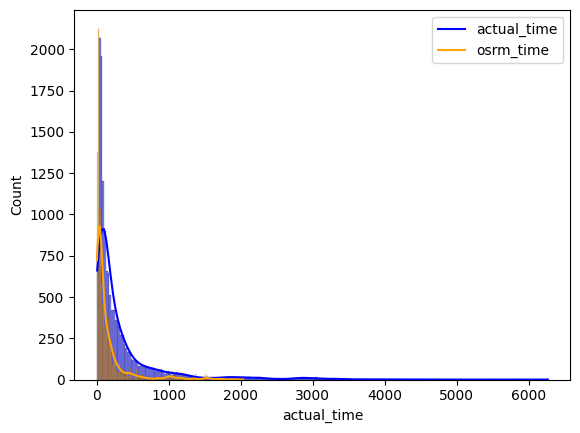

In [327]:
sns.histplot(df_trip_agg['actual_time'],kde=True,color='blue')
sns.histplot(df_trip_agg['osrm_time'],kde=True,color='orange')
plt.legend(['actual_time','osrm_time'])
plt.show()

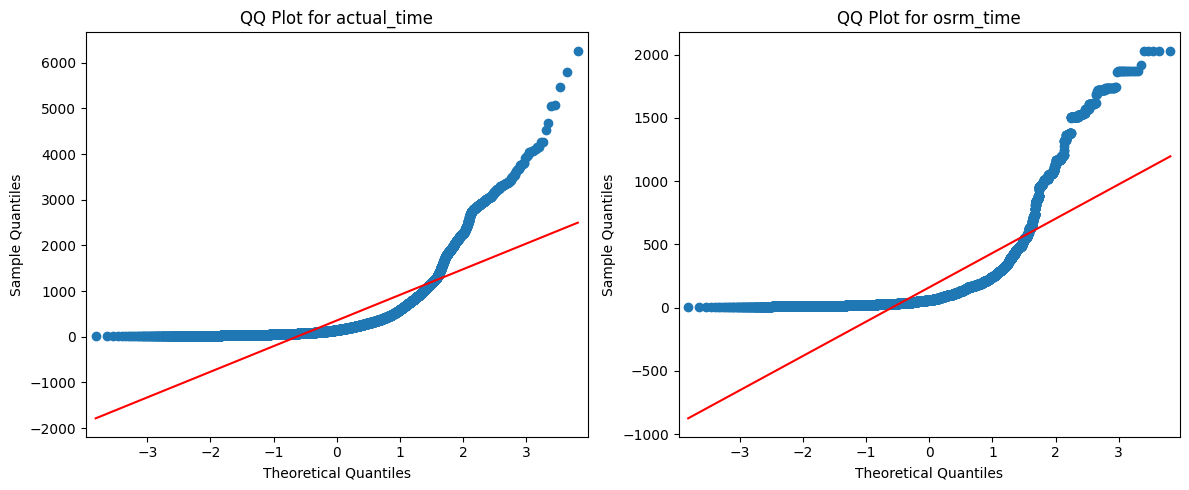

In [328]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

qqplot(df_trip_agg['actual_time'],line='s',ax=axes[0])
axes[0].set_title('QQ Plot for actual_time')

qqplot(df_trip_agg['osrm_time'], line='s', ax=axes[1])
axes[1].set_title('QQ Plot for osrm_time')

plt.tight_layout()
plt.show()

H0: Sample follows Normal Distribution

HA: Sample does not follows Normal Distribution

Test Statistic: Shapiro-Wilk Test

alpha=0.05

In [329]:
stats,p_val=shapiro(df_trip_agg['actual_time'].sample(5000))
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')
else:
  print('Sample follows Normal Distribution')

stats: 0.593522476228063 p_val: 9.791337035773349e-76
Sample does not follow Normal Distribution


In [330]:
stats,p_val=shapiro(df_trip_agg['osrm_time'].sample(5000))
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')

stats: 0.5403594115603554 p_val: 2.435264930343263e-78
Sample does not follow Normal Distribution


In [331]:
#Homogeneity of variance using Levenes test
#H0:Homogenous Variance
#HA: Non-Homogenous Variance

stats,p_val=levene(df_trip_agg['actual_time'],df_trip_agg['osrm_time'])
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Variances are not equal')
  print('Use non-parametric test')
else:
  print('Variances are equal')
  print('Use parametric test')

stats: 1013.8463480511717 p_val: 8.743536461316657e-219
Variances are not equal
Use non-parametric test


Since the samples do not follow any of assumptions so t-test cannot be applied here we can perform its non-parametrice equivalent test i.e Wilcoxon signed rank test beacuse both samples are related

In [332]:
stats,p_val=wilcoxon(df_trip_agg['actual_time'],df_trip_agg['osrm_time'])
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Reject Null Hypothesis, there is significant difference b/w actual and osrm time')
else:
  print('Accept Null Hypothesis, there is no significant difference b/w actual and osrm time')

stats: 95688.5 p_val: 0.0
Reject Null Hypothesis, there is significant difference b/w actual and osrm time


**INSIGHTS**:

- There is a statistically significant difference between the actual_time and osrm_time. This is expected, as actual_time is the real-world time taken for the trip, which can be affected by various factors like traffic, and road conditions, while osrm_time is an estimated time based on an idealized model. The high correlation (0.958781) suggests that osrm_time is a good estimator for actual_time, but it is not a perfect one.

### Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

- Set up Hypothesis framework

--> H0: There is no significant differenct between aggregated actual_time and aggregated segment actual time

--> HA: There is significant differenct between aggregated actual_time and aggregated segment actual time

In [333]:
df1[['actual_time','segment_actual_time']].corr()

,actual_time,segment_actual_time
actual_time,1.000000,0.999989
segment_actual_time,0.999989,1.000000


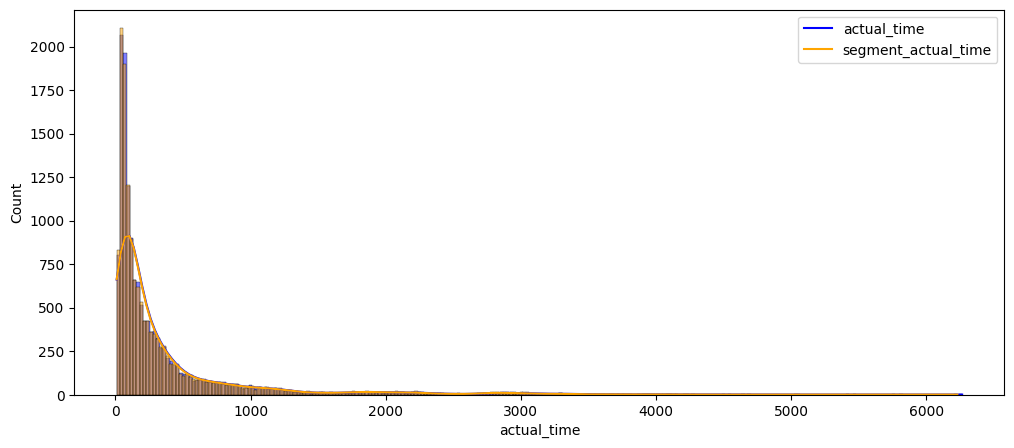

In [334]:
# Visual Tests to check if samples follow normal distribution

plt.figure(figsize=(12,5))
sns.histplot(df1['actual_time'],kde=True,color='blue')
sns.histplot(df1['segment_actual_time'],kde=True,color='orange')
plt.legend(['actual_time','segment_actual_time'])
plt.show()

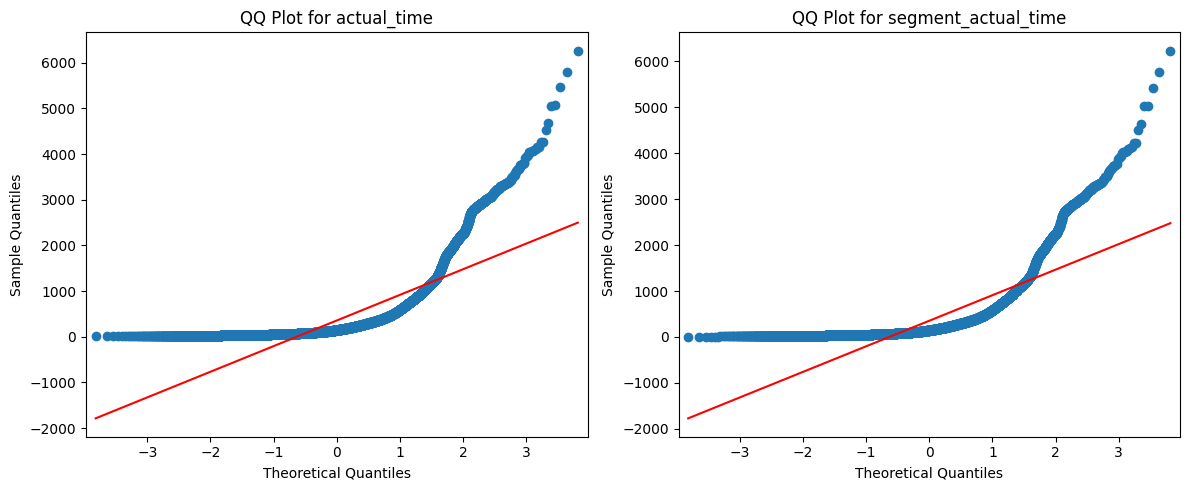

In [335]:
#Distribution check using QQ Plot

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
qqplot(df1['actual_time'],line='s',ax=axes[0])
axes[0].set_title('QQ Plot for actual_time')
qqplot(df1['segment_actual_time'],line='s',ax=axes[1])
axes[1].set_title('QQ Plot for segment_actual_time')
plt.tight_layout()
plt.show()

It can be seen from above plots that samples do not come from Normal distribution

H0: Sample follows Normal Distribution

HA: Sample does not follow Normal Distribution

Test Statistics: Shapiro-Wilk test

alpha=0.05

In [336]:
stats,p_val=shapiro(df1['actual_time'].sample(5000))
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')
  print('Use non-parametric test')
else:
  print('Sample follows Normal Distribution')
  print('Use parametric test')

stats: 0.5907213295090481 p_val: 7.022982286865856e-76
Sample does not follow Normal Distribution
Use non-parametric test


In [337]:
stats,p_val=shapiro(df1['segment_actual_time'].sample(5000))
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')
  print('Use non-parametric test')
else:
  print('Sample follows Normal Distribution')
  print('Use parametric test')

stats: 0.5708515663003679 p_val: 7.021935261183401e-77
Sample does not follow Normal Distribution
Use non-parametric test


In [338]:
# Homogeneity of variances using Levene's test

stats,p_val=levene(df1['actual_time'],df1['segment_actual_time'])
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Variances are not equal')
  print('Use non-parametric test')
else:
  print('Variances are equal')
  print('Use parametric test')

stats: 0.1523862392501683 p_val: 0.6962681452003544
Variances are equal
Use parametric test


Since the samples do not come from Normal Distribution t-test cannot be applied here, we can perform its non parametric equivalent test i.e. Wilcoxon signed rank test

In [339]:
stats,p_val=wilcoxon(df1['actual_time'],df1['segment_actual_time'])
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Reject Null Hypothesis, there is significant difference b/w actual and segment actual time')
else:
  print('Accept Null Hypothesis, there is no significant difference b/w actual and segment actual time')


stats: 11295.0 p_val: 0.0
Reject Null Hypothesis, there is significant difference b/w actual and segment actual time


INSIGHTS:

- There is a statistically significant difference between the actual_time and segment_actual_time. The actual_time represents the total time taken for the entire trip, while the segment_actual_time is the sum of the actual times for each segment of the trip. The high correlation (0.999989) and the result of the hypothesis test suggests that while the two values are very closely related, they are not identical. This could be due to small discrepancies in time measurement at different stages of the trip.

### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

- Set up Hypothesis framework

--> H0: There is no significant differenct between aggregated osrm_distance and aggregated segment_osrm_distance

--> HA: There is significant differenct between aggregated osrm_distance and aggregated segment_osrm_distance

In [340]:
df1[['osrm_distance','segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14787.000000,14787.000000
mean,203.887411,222.705466
std,370.565564,416.846279
min,9.072900,9.072900
25%,30.756900,32.578850
50%,65.302800,69.784200
75%,206.644200,216.560600
max,2840.081000,3523.632400


In [341]:
df1[['osrm_distance','segment_osrm_distance']].corr()

,osrm_distance,segment_osrm_distance
osrm_distance,1.000000,0.994712
segment_osrm_distance,0.994712,1.000000


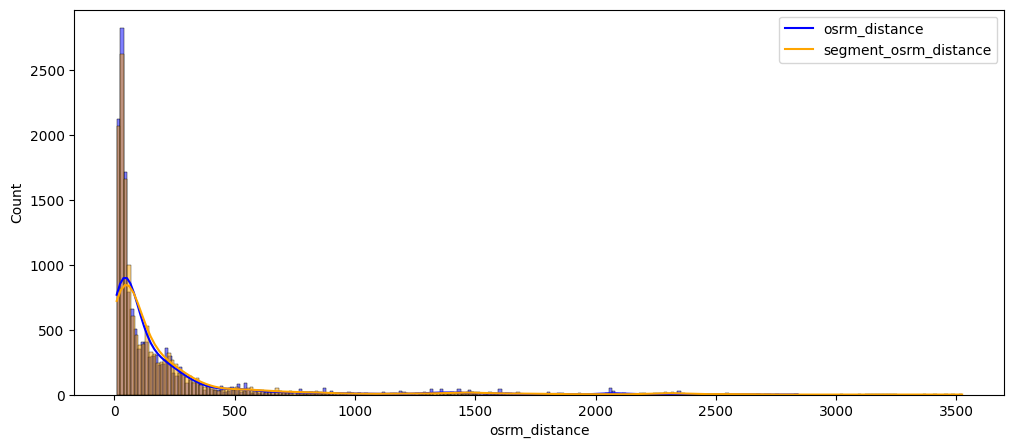

In [342]:
plt.figure(figsize=(12,5))
sns.histplot(df1['osrm_distance'],kde=True,color='blue')
sns.histplot(df1['segment_osrm_distance'],kde=True,color='orange')
plt.legend(['osrm_distance','segment_osrm_distance'])
plt.show()

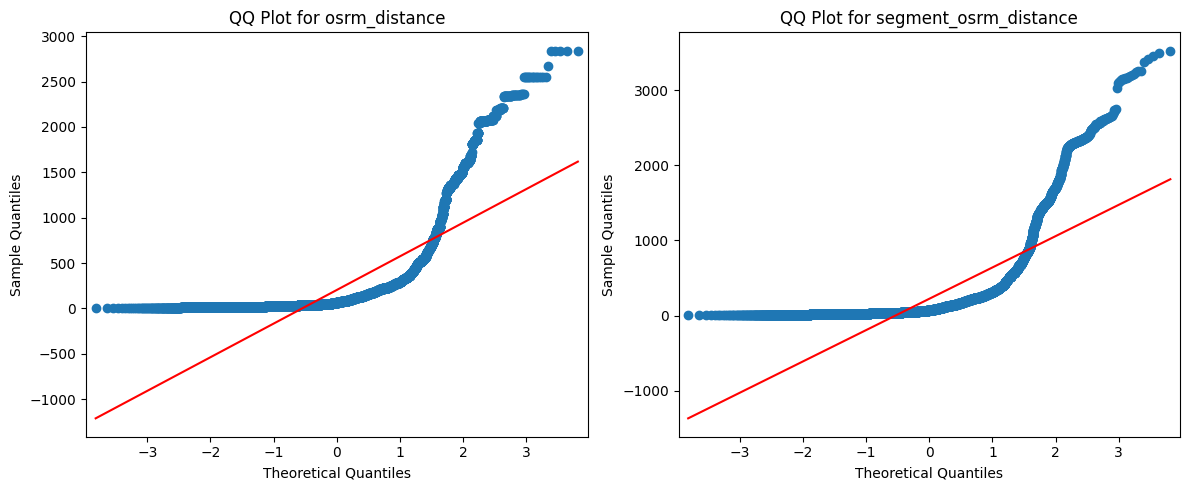

In [343]:
#Distribution check using QQ Plot

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
qqplot(df1['osrm_distance'],line='s',ax=axes[0])
axes[0].set_title('QQ Plot for osrm_distance')
qqplot(df1['segment_osrm_distance'],line='s',ax=axes[1])
axes[1].set_title('QQ Plot for segment_osrm_distance')
plt.tight_layout()
plt.show()


It can be seen from above plot that samples do not come from Normal Distribution

H0: Sample follows Normal Distribution

HA: Sample does not follows Normal Distribution

Test Statistics: Shapiro-wilk test

alpha=0.05

In [344]:
stats,p_val=shapiro(df1['osrm_distance'].sample(5000))
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')
  print('Use non-parametric test')
else:
  print('Sample follows Normal Distribution')
  print('Use parametric test')

stats: 0.5274103439652669 p_val: 6.18954218157771e-79
Sample does not follow Normal Distribution
Use non-parametric test


In [345]:
stats,p_val=shapiro(df1['segment_osrm_distance'].sample(5000))
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')
  print('Use non-parametric test')
else:
  print('Sample follows Normal Distribution')
  print('Use parametric test')

stats: 0.5192843348117513 p_val: 2.6636253233830527e-79
Sample does not follow Normal Distribution
Use non-parametric test


In [346]:
#Homogeneity of Variance using Levene's Test

stats,p_val=levene(df1['osrm_distance'],df1['segment_osrm_distance'])
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Variances are not equal')
  print('Use non-parametric test')
else:
  print('Variances are equal')
  print('Use parametric test')

stats: 13.640878396710558 p_val: 0.00022171213513990103
Variances are not equal
Use non-parametric test


Since the samples do not follow any of assumptions of Normal Distribution so T-test cannot be applied here, we can perform its non-parmetric equivalent test i.e. Wilcoxon signed rank test

In [347]:
stats,p_val=wilcoxon(df1['osrm_distance'],df1['segment_osrm_distance'])
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Reject Null Hypothesis, there is significant difference b/w osrm distance and segment osrm distance')
else:
  print('Accept Null Hypothesis, there is no significant difference b/w osrm distance and segment osrm distance')

stats: 11606680.0 p_val: 0.0
Reject Null Hypothesis, there is significant difference b/w osrm distance and segment osrm distance


**INSIGHTS**:

- There is a statistically significant difference between the osrm_distance and segment_osrm_distance. The osrm_distance represents the estimated distance for the entire trip, while the segment_osrm_distance is the sum of the estimated distances for each segment of the trip. The difference between these two values could be due to various factors, such as detours or alternative routes taken during the trip, which are not accounted for in the segment-level estimations.



### Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

- Set up Hypothesis framework

--> H0: There is no significant differenct between aggregated osrm_time and aggregated segment_osrm time

--> HA: There is significant differenct between aggregated osrm_time and aggregated segment_osrm_time

In [348]:
df1[['osrm_time','segment_osrm_time']].corr()

,osrm_time,segment_osrm_time
osrm_time,1.000000,0.993263
segment_osrm_time,0.993263,1.000000


In [349]:
df1[['osrm_time','segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14787.000000,14787.000000
mean,160.990938,180.511598
std,271.459495,314.679279
min,6.000000,6.000000
25%,29.000000,30.000000
50%,60.000000,65.000000
75%,168.000000,184.000000
max,2032.000000,2564.000000


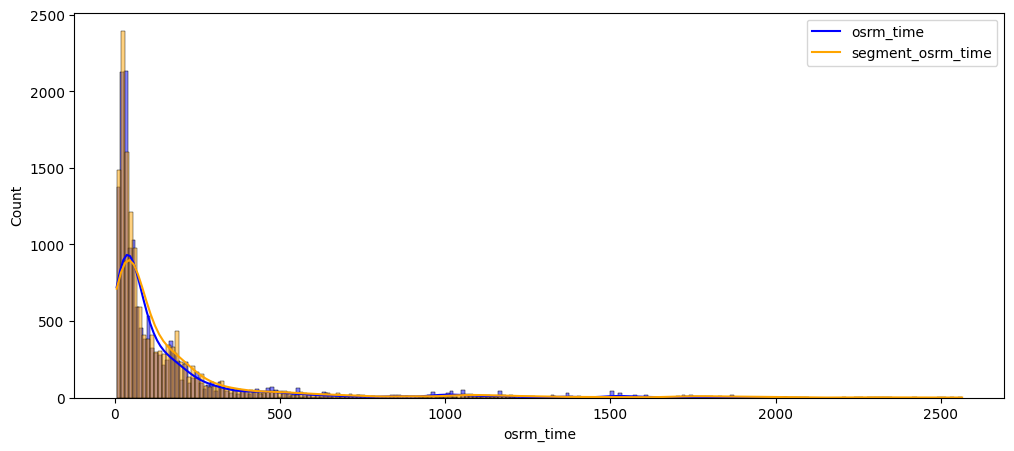

In [350]:
plt.figure(figsize=(12,5))
sns.histplot(df1['osrm_time'],kde=True,color='blue')
sns.histplot(df1['segment_osrm_time'],kde=True,color='orange')
plt.legend(['osrm_time','segment_osrm_time'])
plt.show()

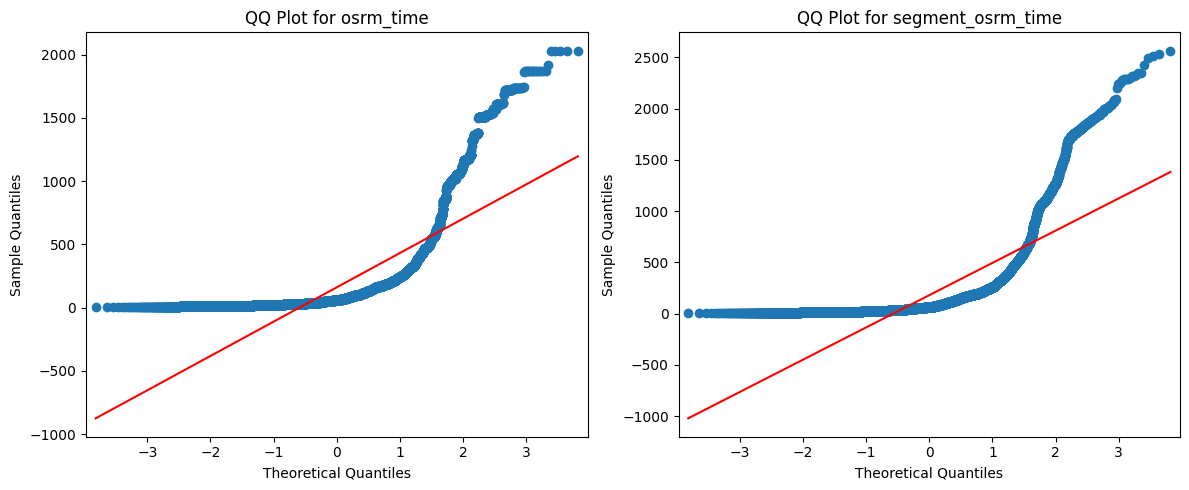

In [351]:
#Distribution check using QQ Plot

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
qqplot(df1['osrm_time'],line='s',ax=axes[0])
axes[0].set_title('QQ Plot for osrm_time')
qqplot(df1['segment_osrm_time'],line='s',ax=axes[1])
axes[1].set_title('QQ Plot for segment_osrm_time')
plt.tight_layout()
plt.show()

H0: Sample follow Normal Distribution

HA: Sample does not follows Normal Distribution

alpha=0.05

Test Statistics: Shapiro-Wilk test

In [352]:
stats,p_val=shapiro(df1['osrm_time'].sample(5000))
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')
  print('Use non-parametric test')
else:
  print('Sample follows Normal Distribution')
  print('Use parametric test')

stats: 0.5486291050992045 p_val: 5.943630564671601e-78
Sample does not follow Normal Distribution
Use non-parametric test


In [353]:
stats,p_val=shapiro(df1['segment_osrm_time'].sample(5000))
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Sample does not follow Normal Distribution')
  print('Use non-parametric test')
else:
  print('Sample follows Normal Distribution')
  print('Use parametric test')

stats: 0.5416586944950009 p_val: 2.7991711140778203e-78
Sample does not follow Normal Distribution
Use non-parametric test


In [354]:
#Homogeneity of variances using Levene's test

stats,p_val=levene(df1['osrm_time'],df1['segment_osrm_time'])
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Variances are not equal')
  print('Use non-parametric test')
else:
  print('Variances are equal')
  print('Use parametric test')

stats: 28.53905343143278 p_val: 9.250556006347759e-08
Variances are not equal
Use non-parametric test


Since sample do not follow any of assumptions of Normal Distribution so T-test cannot be applied here, we can perform its non perform equivalent test i.e. Wilcoxon signed rank test

In [355]:
stats,p_val=wilcoxon(df1['osrm_time'],df1['segment_osrm_time'])
print('stats:',stats,'p_val:',p_val)
if p_val<0.05:
  print('Reject Null Hypothesis, there is significant difference b/w osrm time and segment osrm time')
else:
  print('Accept Null Hypothesis, there is no significant difference b/w osrm time and segment osrm time')

stats: 13393947.5 p_val: 0.0
Reject Null Hypothesis, there is significant difference b/w osrm time and segment osrm time


**INSIGHTS**:

- This indicates that there is a statistically significant difference between the osrm_time and segment_osrm_time. The osrm_time represents the estimated time for the entire trip, while the segment_osrm_time is the sum of the estimated times for each segment of the trip. The difference between these two values could be due to various factors, such as waiting times at intermediate locations, which are not accounted for in the segment-level estimations.

### Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [356]:
numerical_cols = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']

df1[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,21890.929938,22644.299867,0.000000,6823.500000,13164.000000,27425.500000,86379.000000
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400


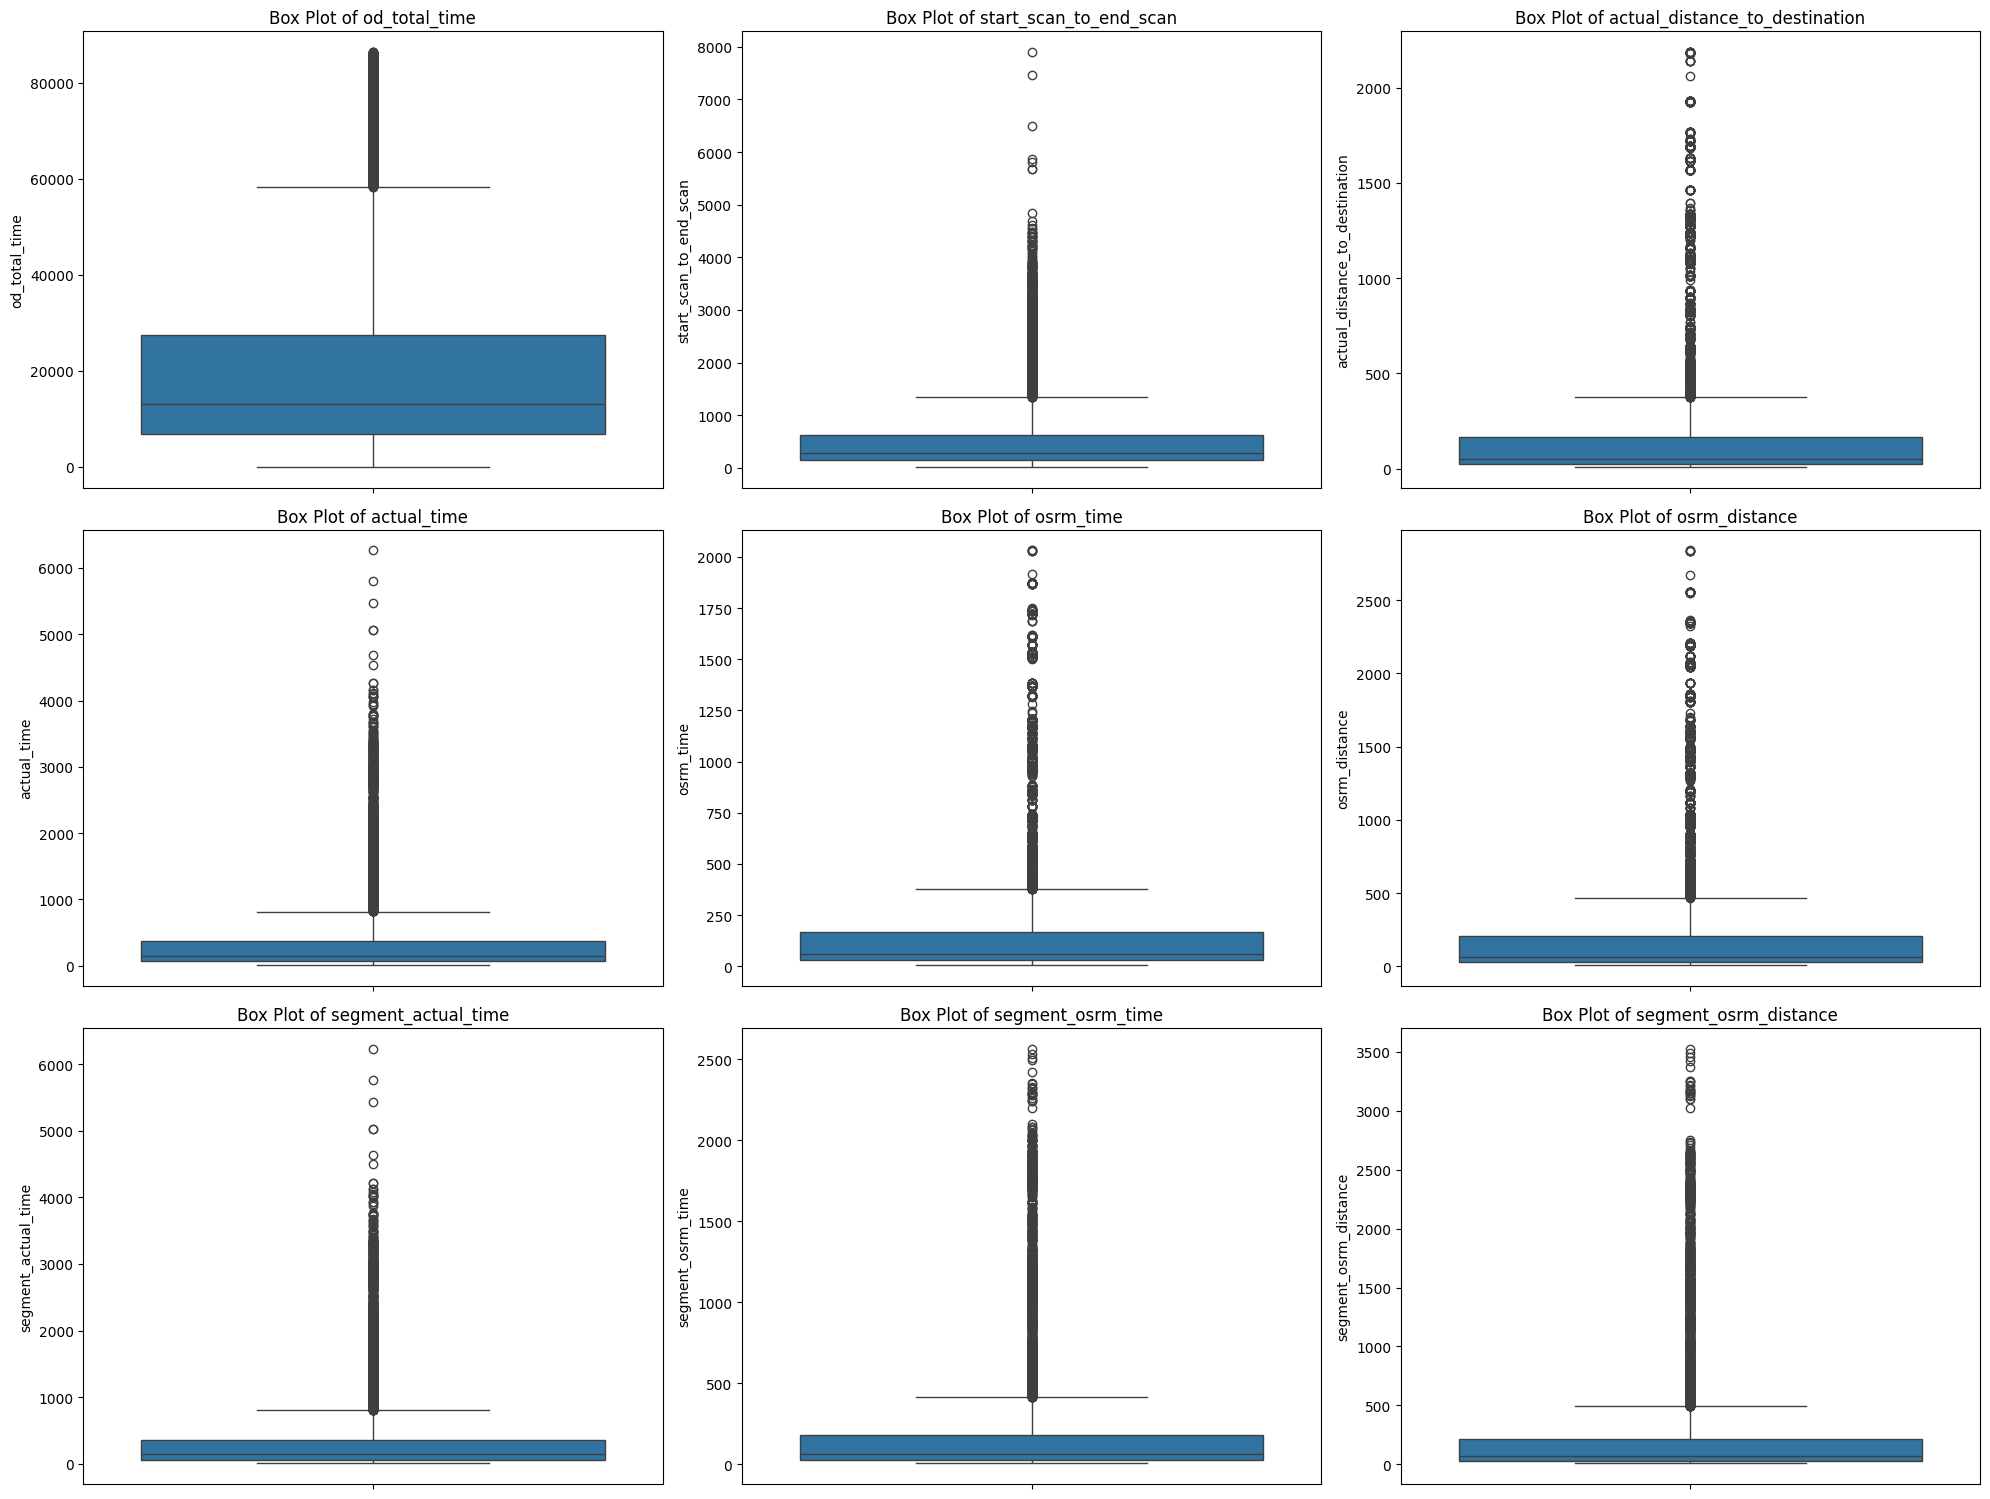

In [357]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y=df1[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### **INSIGHTS**:

- **`od_total_time`**: The box plot for `od_total_time` shows that most of the data points are concentrated within a specific range, but there are numerous outliers, indicating that some trips take significantly longer than the average.

- **`start_scan_to_end_scan`**: Similar to `od_total_time`, the `start_scan_to_end_scan` variable has a number of outliers on the higher end, suggesting that the time from the start of the scan to the end of the scan can be unusually long for some trips.

- **`actual_distance_to_destination`**: The box plot for `actual_distance_to_destination` reveals a wide range of distances, with a significant number of outliers, indicating that some destinations are much farther than the typical distance.

- **`actual_time`**: The `actual_time` taken for trips also shows a number of outliers, suggesting that some trips take much longer than the average, which could be due to various factors like traffic, and road conditions.

- **`osrm_time` and `osrm_distance`**: Both OSRM (Open Source Routing Machine) time and distance have outliers, which suggests that the estimated time and distance can be unusually high for certain routes.

- **`segment_actual_time`**, **`segment_osrm_time`**, and **`segment_osrm_distance`**: These segment-level features also exhibit outliers, indicating that certain segments of the trips can be exceptionally long in terms of time or distance.

Overall, the presence of outliers in almost all numerical variables suggests that the dataset contains a wide variety of trips with different characteristics. These outliers might represent special cases or data errors that need to be handled before building any predictive models.

### Handle the outliers using the IQR method

In [358]:
df_out=df1.copy()
for col in numerical_cols:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f'lower limit of {col} = {lower_bound} ')
    print(f'upper limit of {col} = {upper_bound}')
    print('*'*100)
    df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]

print("Outliers have been handled using the IQR method.")
print("New shape of the DataFrame:", df_out.shape)
df_out.head()

lower limit of od_total_time = -24079.5 
upper limit of od_total_time = 58328.5
****************************************************************************************************
lower limit of start_scan_to_end_scan = -405.5 
upper limit of start_scan_to_end_scan = 1046.5
****************************************************************************************************
lower limit of actual_distance_to_destination = -91.56862956309493 
upper limit of actual_distance_to_destination = 208.44742548946317
****************************************************************************************************
lower limit of actual_time = -158.5 
upper limit of actual_time = 413.5
****************************************************************************************************
lower limit of osrm_time = -56.25 
upper limit of osrm_time = 157.75
****************************************************************************************************
lower limit of osrm_distance = -48.354624999

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,...,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_week,trip_creation_hour,od_total_time
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,...,Karnataka,Doddablpur,ChikaDPP,D,2018.0,9.0,20.0,38,2.0,0
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,...,Maharashtra,Mumbai Hub,None,None,2018.0,9.0,20.0,38,2.0,6029
5,trip-153671055416136166,IND600056AAA,IND600056AAA,training,Carting,2018-09-12 00:02:34.161600,Chennai_Poonamallee (Tamil Nadu),Chennai_Poonamallee (Tamil Nadu),189.0,24.597048,...,Tamil Nadu,Chennai,Poonamallee,None,2018.0,9.0,20.0,38,2.0,0
6,trip-153671066201138152,IND600044AAD,IND600048AAA,training,Carting,2018-09-12 00:04:22.011653,Chennai_Chrompet_DPC (Tamil Nadu),Chennai_Vandalur_Dc (Tamil Nadu),98.0,9.100510,...,Tamil Nadu,Chennai,Chrompet,DPC,2018.0,9.0,20.0,38,2.0,5880
7,trip-153671066826362165,IND560043AAC,IND560043AAC,training,Carting,2018-09-12 00:04:28.263977,HBR Layout PC (Karnataka),HBR Layout PC (Karnataka),146.0,22.424210,...,Karnataka,HBR Layout PC,None,None,2018.0,9.0,20.0,38,2.0,10586


### **INSIGHTS**:

The outliers in the numerical variables have been handled using the Interquartile Range (IQR) method. Here's a summary of the process and its impact:

- **Method**: For each numerical column, the first quartile (Q1) and the third quartile (Q3) were calculated. The IQR was then computed as `Q3 - Q1`. Outliers were identified as any data points that fell below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

- **Impact**: After removing the outliers, the shape of the DataFrame was reduced from its original size to a new shape of (8134, 32). This indicates that a significant number of rows were identified as containing outliers and were removed from the dataset.

- **Effect on Data Distribution**: By removing the outliers, the distribution of the numerical variables has become more concentrated around the mean, which can improve the performance of machine learning models that are sensitive to extreme values.

The new DataFrame, `df_out`, now contains the data with outliers handled, making it more suitable for further analysis and modeling.

### Do one-hot encoding of categorical variables (like route_type)

In [359]:
#Get value counts before one-hot encoding

df_out['route_type'].value_counts()

,count
route_type,
Carting,7293
FTL,841


In [360]:
df_new=pd.get_dummies(df_out,columns=['route_type','data'],drop_first='True')
df_new.head()

,trip_uuid,source_center,destination_center,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,...,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_week,trip_creation_hour,od_total_time,route_type_FTL,data_training
1,trip-153671042288605164,IND561203AAB,IND561203AAB,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,143.0,68.0,...,ChikaDPP,D,2018.0,9.0,20.0,38,2.0,0,False,True
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,...,None,None,2018.0,9.0,20.0,38,2.0,6029,False,True
5,trip-153671055416136166,IND600056AAA,IND600056AAA,2018-09-12 00:02:34.161600,Chennai_Poonamallee (Tamil Nadu),Chennai_Poonamallee (Tamil Nadu),189.0,24.597048,61.0,23.0,...,Poonamallee,None,2018.0,9.0,20.0,38,2.0,0,False,True
6,trip-153671066201138152,IND600044AAD,IND600048AAA,2018-09-12 00:04:22.011653,Chennai_Chrompet_DPC (Tamil Nadu),Chennai_Vandalur_Dc (Tamil Nadu),98.0,9.100510,24.0,13.0,...,Chrompet,DPC,2018.0,9.0,20.0,38,2.0,5880,False,True
7,trip-153671066826362165,IND560043AAC,IND560043AAC,2018-09-12 00:04:28.263977,HBR Layout PC (Karnataka),HBR Layout PC (Karnataka),146.0,22.424210,64.0,34.0,...,None,None,2018.0,9.0,20.0,38,2.0,10586,False,True


**INSIGHTS**:

- The `route_type` column, which originally contained the values 'Carting' and 'FTL', has been converted into a new binary column `route_type_FTL`. A value of 1 in this column indicates that the route type is 'FTL', while a value of 0 indicates that it is 'Carting'.

- Similarly, the `data` column has been converted into a binary column `data_training`.

- By performing one-hot encoding, we have transformed the categorical variables into a format that can be used for building predictive models, without introducing any ordinal relationship between the categories.

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [361]:
# Identify numerical columns (excluding the one-hot encoded columns)
numerical_cols = df_new.select_dtypes(include=np.number).columns.tolist()
categorical_cols = ['route_type_FTL', 'data_training']
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_new[numerical_cols] = scaler.fit_transform(df_new[numerical_cols])

# Display the first few rows with the scaled data
df_new.head()

,trip_uuid,source_center,destination_center,trip_creation_time,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,...,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_week,trip_creation_hour,od_total_time,route_type_FTL,data_training
1,trip-153671042288605164,IND561203AAB,IND561203AAB,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),-0.052367,2.311494,1.121054,1.595411,...,ChikaDPP,D,0.0,-0.363982,0.199376,-0.307026,-1.416507,-1.458572,False,True
3,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),-0.718959,-0.720828,-0.526757,-1.071104,...,None,None,0.0,-0.363982,0.199376,-0.307026,-1.416507,-0.616143,False,True
5,trip-153671055416136166,IND600056AAA,IND600056AAA,2018-09-12 00:02:34.161600,Chennai_Poonamallee (Tamil Nadu),Chennai_Poonamallee (Tamil Nadu),0.022625,-0.319032,-0.487524,-0.668611,...,Poonamallee,None,0.0,-0.363982,0.199376,-0.307026,-1.416507,-1.458572,False,True
6,trip-153671066201138152,IND600044AAD,IND600048AAA,2018-09-12 00:04:22.011653,Chennai_Chrompet_DPC (Tamil Nadu),Chennai_Vandalur_Dc (Tamil Nadu),-0.735624,-1.157974,-1.213345,-1.171728,...,Chrompet,DPC,0.0,-0.363982,0.199376,-0.307026,-1.416507,-0.636962,False,True
7,trip-153671066826362165,IND560043AAC,IND560043AAC,2018-09-12 00:04:28.263977,HBR Layout PC (Karnataka),HBR Layout PC (Karnataka),-0.335668,-0.436664,-0.428673,-0.115184,...,None,None,0.0,-0.363982,0.199376,-0.307026,-1.416507,0.020605,False,True


**INSIGHTS**:

-  The StandardScaler subtracts the mean from each data point and then divides by the standard deviation. This results in a distribution with a mean of 0 and a standard deviation of 1.

- By standardizing the numerical features, we have prepared the data for building robust and accurate machine learning models.

# **BUSINESS RECOMMENDATIONS**

1. Improve Route Planning Efficiency

  - Use real-time traffic data to update estimated delivery times.

  - Improve driver routing tools or navigation systems.

2. Optimize Hub Operations

  - Automate scan processes to reduce manual errors.

  - Add staffing during peak hours at underperforming centers.

3. Focus on Delay-Prone Routes

  - Review contracts with 3rd-party vendors for those routes.

  - Explore alternate transport modes or intermediate hubs.

4. Redesign SLAs Based on Real Patterns

  - Adjust Service Level Agreements (SLAs) to reflect actual ground conditions.

  - Avoid over-promising delivery times.

5. Prioritize High-Deviation Trips

  - Flag and investigate top 5% delayed trips regularly.

  - Create dashboards for real-time deviation monitoring.

6. Use Feature Engineering to Predict Delays

  - Build a predictive model to flag high-risk trips before dispatch.

  - Use this to prioritize shipments and allocate best resources.

7. Standardize Time Measurement Practices

  - Enforce standard SOPs for scans and updates across all centers.

  - Conduct training where outliers are detected.